In [ ]:
! wget https://github.com/dataprofessor/beta-lactamase/raw/main/beta_lactamase_CHEMBL29.zip

--2021-10-12 09:24:12--  https://github.com/dataprofessor/beta-lactamase/raw/main/beta_lactamase_CHEMBL29.zip
Resolving github.com (github.com)... 52.192.72.89
Connecting to github.com (github.com)|52.192.72.89|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/beta-lactamase/main/beta_lactamase_CHEMBL29.zip [following]
--2021-10-12 09:24:12--  https://raw.githubusercontent.com/dataprofessor/beta-lactamase/main/beta_lactamase_CHEMBL29.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1416390 (1.4M) [application/zip]
Saving to: ‘beta_lactamase_CHEMBL29.zip’

beta_lactamase_CHEM 100%[===================>]   1.35M  --.-KB/s    in 0.1s    

2021-10-12 09:24:13 (12.8 MB/s) - ‘beta_lacta

## Load The Data

In [1]:
import zipfile
import pandas as pd

zf = zipfile.ZipFile("beta_lactamase_CHEMBL29.zip", "r")
df = pd.concat( pd.read_csv(zf.open(f)) for f in zf.namelist() )
df.head()

,molecule_chembl_id,canonical_smiles,standard_relation,standard_value,standard_units,standard_type,pchembl_value,target_pref_name,bao_label
0,CHEMBL1730,CO/N=C(\C(=O)N[C@@H]1C(=O)N2C(C(=O)O)=C(COC(C)...,=,10.0,/mM/s,Kcat/Km,NaN,Gil1,assay format
1,CHEMBL996,CO[C@@]1(NC(=O)Cc2cccs2)C(=O)N2C(C(=O)O)=C(COC...,NaN,NaN,NaN,Kcat/Km,NaN,Gil1,assay format
2,CHEMBL617,CC(=O)OCC1=C(C(=O)O)N2C(=O)[C@@H](NC(=O)Cc3ccc...,=,598.0,/mM/s,Kcat/Km,NaN,Gil1,assay format
3,CHEMBL702,CCN1CCN(C(=O)N[C@@H](C(=O)N[C@@H]2C(=O)N3[C@@H...,=,3400.0,/mM/s,Kcat/Km,NaN,Gil1,assay format
4,CHEMBL1449,CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](C(=O)O)c3ccsc3...,=,10000.0,/mM/s,Kcat/Km,NaN,Gil1,assay format


## Explore the data

In [2]:
print("# of the unique Chembl ID: ", len(df.molecule_chembl_id.unique()))
print("# of existing Chembl ID: ", len(df.molecule_chembl_id))

# of the unique Chembl ID:  64436
# of existing Chembl ID:  71973


<AxesSubplot:>

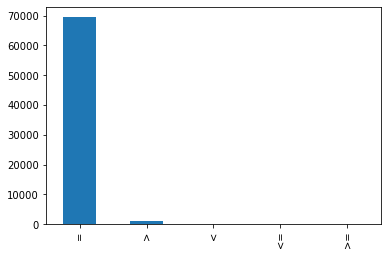

In [3]:
df['standard_relation'].value_counts().plot(kind='bar')

In [4]:
df.standard_value.min(), df.standard_value.max()

(-10.0, 50000000.0)

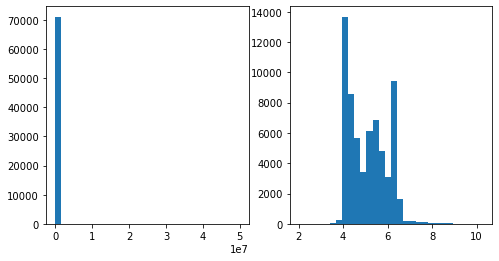

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].hist(x=df.standard_value, bins=30)
ax[1].hist(x=df.pchembl_value, bins=30)
plt.show()

## Preprocess the data

In [6]:
print(df.shape)
df.head()

(71973, 9)


,molecule_chembl_id,canonical_smiles,standard_relation,standard_value,standard_units,standard_type,pchembl_value,target_pref_name,bao_label
0,CHEMBL1730,CO/N=C(\C(=O)N[C@@H]1C(=O)N2C(C(=O)O)=C(COC(C)...,=,10.0,/mM/s,Kcat/Km,NaN,Gil1,assay format
1,CHEMBL996,CO[C@@]1(NC(=O)Cc2cccs2)C(=O)N2C(C(=O)O)=C(COC...,NaN,NaN,NaN,Kcat/Km,NaN,Gil1,assay format
2,CHEMBL617,CC(=O)OCC1=C(C(=O)O)N2C(=O)[C@@H](NC(=O)Cc3ccc...,=,598.0,/mM/s,Kcat/Km,NaN,Gil1,assay format
3,CHEMBL702,CCN1CCN(C(=O)N[C@@H](C(=O)N[C@@H]2C(=O)N3[C@@H...,=,3400.0,/mM/s,Kcat/Km,NaN,Gil1,assay format
4,CHEMBL1449,CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](C(=O)O)c3ccsc3...,=,10000.0,/mM/s,Kcat/Km,NaN,Gil1,assay format


### Remove the data that doesn't contain equal relation

In [2]:
df_filtered = df[df['standard_relation'] == '=']

print(df_filtered.shape)
df_filtered.head()

(69469, 9)


,molecule_chembl_id,canonical_smiles,standard_relation,standard_value,standard_units,standard_type,pchembl_value,target_pref_name,bao_label
0,CHEMBL1730,CO/N=C(\C(=O)N[C@@H]1C(=O)N2C(C(=O)O)=C(COC(C)...,=,10.0,/mM/s,Kcat/Km,NaN,Gil1,assay format
2,CHEMBL617,CC(=O)OCC1=C(C(=O)O)N2C(=O)[C@@H](NC(=O)Cc3ccc...,=,598.0,/mM/s,Kcat/Km,NaN,Gil1,assay format
3,CHEMBL702,CCN1CCN(C(=O)N[C@@H](C(=O)N[C@@H]2C(=O)N3[C@@H...,=,3400.0,/mM/s,Kcat/Km,NaN,Gil1,assay format
4,CHEMBL1449,CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](C(=O)O)c3ccsc3...,=,10000.0,/mM/s,Kcat/Km,NaN,Gil1,assay format
5,CHEMBL1082,CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccc(O)cc3)...,=,4540.0,/mM/s,Kcat/Km,NaN,Gil1,assay format


### Aggregate the ChEMBL ID
- If the standard deviation is greater than 2 => Remove it
- If less, aggregate the value and use it as the main value

In [8]:
df_filtered.groupby('molecule_chembl_id').mean()

,standard_value,pchembl_value
molecule_chembl_id,,
CHEMBL1003,217250.500000,NaN
CHEMBL101476,12.000000,NaN
CHEMBL1018,316.200000,6.500000
CHEMBL102079,4.000000,NaN
CHEMBL102131,10.000000,NaN
...,...,...
CHEMBL97643,11220.200000,4.950000
CHEMBL977,631.000000,6.200000
CHEMBL98406,63095.700000,4.200000


In [3]:
pchembl_std = df_filtered.groupby('molecule_chembl_id').std().reset_index()
pchembl_std[pchembl_std['pchembl_value'] > 2]

,molecule_chembl_id,standard_value,pchembl_value
58168,CHEMBL166730,1.048551e+06,2.382950
58336,CHEMBL1795572,1.789093e+04,2.041429
62246,CHEMBL3234727,5.013387e+04,2.015254
62312,CHEMBL338933,4.571171e+04,2.020726
62791,CHEMBL4114669,1.557593e+04,2.232136
62801,CHEMBL4114749,2.605293e+03,2.141316
63099,CHEMBL4533632,3.604123e+03,2.283955
63736,CHEMBL67925,7.068239e+03,2.404163


In [4]:
remove_chembl_id = pchembl_std[pchembl_std['pchembl_value'] > 2].molecule_chembl_id.values
remove_chembl_id

array(['CHEMBL166730', 'CHEMBL1795572', 'CHEMBL3234727', 'CHEMBL338933',
       'CHEMBL4114669', 'CHEMBL4114749', 'CHEMBL4533632', 'CHEMBL67925'],
      dtype=object)

In [5]:
df_filtered = df_filtered[~df_filtered.molecule_chembl_id.isin(remove_chembl_id)]

print(df_filtered.shape)
df_filtered.sort_values('molecule_chembl_id')

(69448, 9)


,molecule_chembl_id,canonical_smiles,standard_relation,standard_value,standard_units,standard_type,pchembl_value,target_pref_name,bao_label
676,CHEMBL1003,O=C([O-])[C@H]1/C(=C/CO)O[C@@H]2CC(=O)N21.[K+],=,539000.0,nM,IC50,NaN,Beta-lactamase,single protein format
197,CHEMBL1003,O=C([O-])[C@H]1/C(=C/CO)O[C@@H]2CC(=O)N21.[K+],=,1.0,NaN,Relative protection,NaN,Beta-lactamase,single protein format
687,CHEMBL1003,O=C([O-])[C@H]1/C(=C/CO)O[C@@H]2CC(=O)N21.[K+],=,330000.0,nM,IC50,NaN,Beta-lactamase,single protein format
7,CHEMBL1003,O=C([O-])[C@H]1/C(=C/CO)O[C@@H]2CC(=O)N21.[K+],=,1.0,NaN,Relative protection,NaN,Beta-lactamase,single protein format
9,CHEMBL101476,C[C@H](N)C(=O)NC[C@H]1OCC[C@H]1SC1=C(C(=O)[O-]...,=,12.0,NaN,Relative hydrolysis,NaN,Renal dipeptidase,single protein format
...,...,...,...,...,...,...,...,...,...
28,CHEMBL996,CO[C@@]1(NC(=O)Cc2cccs2)C(=O)N2C(C(=O)O)=C(COC...,=,1.0,10'6/M/s,Kcat/Km,NaN,Metallo-beta-lactamase VIM-2,single protein format
9,CHEMBL996,CO[C@@]1(NC(=O)Cc2cccs2)C(=O)N2C(C(=O)O)=C(COC...,=,1.0,/mM/s,Kcat/Km,NaN,Beta-lactamase,assay format
24,CHEMBL996,CO[C@@]1(NC(=O)Cc2cccs2)C(=O)N2C(C(=O)O)=C(COC...,=,1.0,/s,Kcat,NaN,Beta-lactamase NDM-1,single protein format
68,CHEMBL996,CO[C@@]1(NC(=O)Cc2cccs2)C(=O)N2C(C(=O)O)=C(COC...,=,500.0,U,Activity,NaN,Beta-lactamase,assay format


In [6]:
agg_id = df_filtered.groupby('molecule_chembl_id').agg(['std', 'mean']).reset_index()['molecule_chembl_id']

In [7]:
agg_res = df_filtered.groupby('molecule_chembl_id').agg(['std', 'mean']).reset_index()['pchembl_value']

In [8]:
df_agg = pd.concat([agg_id, agg_res], axis=1)
print(df_agg.shape)
df_agg.head()

(63926, 3)


,molecule_chembl_id,std,mean
0,CHEMBL1003,NaN,NaN
1,CHEMBL101476,NaN,NaN
2,CHEMBL1018,NaN,6.5
3,CHEMBL102079,NaN,NaN
4,CHEMBL102131,NaN,NaN


In [9]:
df_smiles = df_filtered[['molecule_chembl_id', 'canonical_smiles']].drop_duplicates()
print(df_smiles.shape)
df_smiles.head()

(63926, 2)


,molecule_chembl_id,canonical_smiles
0,CHEMBL1730,CO/N=C(\C(=O)N[C@@H]1C(=O)N2C(C(=O)O)=C(COC(C)...
2,CHEMBL617,CC(=O)OCC1=C(C(=O)O)N2C(=O)[C@@H](NC(=O)Cc3ccc...
3,CHEMBL702,CCN1CCN(C(=O)N[C@@H](C(=O)N[C@@H]2C(=O)N3[C@@H...
4,CHEMBL1449,CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](C(=O)O)c3ccsc3...
5,CHEMBL1082,CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccc(O)cc3)...


In [10]:
df_clean = df_smiles.merge(df_agg, on='molecule_chembl_id')
df_clean = df_clean.drop('std', axis=1)
df_clean.columns = ['chembl_id', 'smiles', 'pchembl_value']
df_clean = df_clean.dropna()
print(df_clean.shape)
df_clean.head()

(63014, 3)


,chembl_id,smiles,pchembl_value
0,CHEMBL1730,CO/N=C(\C(=O)N[C@@H]1C(=O)N2C(C(=O)O)=C(COC(C)...,5.95
2,CHEMBL702,CCN1CCN(C(=O)N[C@@H](C(=O)N[C@@H]2C(=O)N3[C@@H...,6.70
4,CHEMBL1082,CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccc(O)cc3)...,4.45
5,CHEMBL29,CC1(C)S[C@@H]2[C@H](NC(=O)Cc3ccccc3)C(=O)N2[C@...,4.70
6,CHEMBL148,C[C@@H](O)[C@H]1C(=O)N2C(C(=O)O)=C(SCCNC=N)C[C...,7.02


In [11]:
df_clean.isnull().sum()

chembl_id        0
smiles           0
pchembl_value    0
dtype: int64

## Feature Extraction using Padelpy

In [20]:
df_clean.head()

,chembl_id,smiles,pchembl_value
0,CHEMBL1730,CO/N=C(\C(=O)N[C@@H]1C(=O)N2C(C(=O)O)=C(COC(C)...,5.95
2,CHEMBL702,CCN1CCN(C(=O)N[C@@H](C(=O)N[C@@H]2C(=O)N3[C@@H...,6.70
4,CHEMBL1082,CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccc(O)cc3)...,4.45
5,CHEMBL29,CC1(C)S[C@@H]2[C@H](NC(=O)Cc3ccccc3)C(=O)N2[C@...,4.70
6,CHEMBL148,C[C@@H](O)[C@H]1C(=O)N2C(C(=O)O)=C(SCCNC=N)C[C...,7.02


In [21]:
! pip install padelpy

In [22]:
from padelpy import padeldescriptor

fingerprint = 'pubchem'
output_file = ''.join([fingerprint, '.csv'])
descriptor = 'PubchemFingerprinter.xml'

In [23]:
df2 = df_clean[['smiles', 'chembl_id']]
df2.to_csv('molecule.smi', sep='\t', header=False, index=False)
df2.head()

,smiles,chembl_id
0,CO/N=C(\C(=O)N[C@@H]1C(=O)N2C(C(=O)O)=C(COC(C)...,CHEMBL1730
2,CCN1CCN(C(=O)N[C@@H](C(=O)N[C@@H]2C(=O)N3[C@@H...,CHEMBL702
4,CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccc(O)cc3)...,CHEMBL1082
5,CC1(C)S[C@@H]2[C@H](NC(=O)Cc3ccccc3)C(=O)N2[C@...,CHEMBL29
6,C[C@@H](O)[C@H]1C(=O)N2C(C(=O)O)=C(SCCNC=N)C[C...,CHEMBL148


In [ ]:
! wget https://github.com/dataprofessor/padel/blob/main/fingerprints_xml.zip

In [24]:
padeldescriptor(d_file='pubchem_fingerprint.csv', mol_dir='molecule.smi', descriptortypes=descriptor, fingerprints=True, log=True)

In [12]:
df_fp = pd.read_csv('pubchem_fingerprint.csv')
df_fp.head()

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL777,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CHEMBL404,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CHEMBL158,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CHEMBL148,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CHEMBL1730,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
print(df_fp.shape)

(63014, 882)


In [14]:
df_final = df_fp.merge(df_clean[['chembl_id', 'pchembl_value']], left_on='Name', right_on='chembl_id')
df_final = df_final.drop('chembl_id', axis=1)
df_final = df_final.dropna()

print(df_final.shape)
df_final.head()

(63013, 883)


,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pchembl_value
0,CHEMBL777,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.474324
1,CHEMBL404,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.310769
2,CHEMBL158,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.018000
3,CHEMBL148,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.020000
4,CHEMBL1730,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.950000


In [15]:
df_final.isnull().sum().sum()

0

In [30]:
X = df_final.drop(['Name', 'pchembl_value'], axis=1).values
y = df_final.pchembl_value.values

X, y

(array([[1., 1., 0., ..., 0., 0., 0.],
        [1., 1., 0., ..., 0., 0., 0.],
        [1., 1., 1., ..., 0., 0., 0.],
        ...,
        [1., 1., 1., ..., 0., 0., 0.],
        [1., 1., 1., ..., 0., 0., 0.],
        [1., 1., 1., ..., 0., 0., 0.]]),
 array([6.47432432, 6.31076923, 7.018     , ..., 5.75      , 4.02      ,
        4.7       ]))

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Regression

## Random Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [33]:
y_test_pred = model.predict(X_test)

In [34]:
from sklearn.metrics import mean_squared_error, r2_score

print(mean_squared_error(y_test, y_test_pred))
print(r2_score(y_test, y_test_pred))

0.7144724945469162
-0.02172326630746091


## Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [41]:
y_test_pred = model.predict(X_test)

In [42]:
from sklearn.metrics import mean_squared_error, r2_score

print(mean_squared_error(y_test, y_test_pred))
print(r2_score(y_test, y_test_pred))

8.321135560879261e+18
-1.1899545286260763e+19


## Support Vector Regression

In [43]:
from sklearn.svm import SVR

model = SVR()
model.fit(X_train, y_train)

SVR()

In [44]:
y_test_pred = model.predict(X_test)

In [45]:
from sklearn.metrics import mean_squared_error, r2_score

print(mean_squared_error(y_test, y_test_pred))
print(r2_score(y_test, y_test_pred))

0.7126632380234975
-0.01913595958984171


# Classification

## Prepare the data

In [16]:
df_final.head()

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pchembl_value
0,CHEMBL777,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.474324
1,CHEMBL404,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.310769
2,CHEMBL158,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.018000
3,CHEMBL148,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.020000
4,CHEMBL1730,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.950000


In [17]:
def got_label(x):
    if x < 5:
        return "Inactive"
    elif x > 6:
        return "Active"
    else:
        return "Intermediate"

df_final['activity'] = df_final.pchembl_value.apply(got_label)
df_final.head()

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pchembl_value,activity
0,CHEMBL777,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.474324,Active
1,CHEMBL404,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.310769,Active
2,CHEMBL158,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.018000,Active
3,CHEMBL148,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.020000,Active
4,CHEMBL1730,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.950000,Intermediate


In [18]:
df_final.activity.value_counts(normalize=True)

Inactive        0.477933
Intermediate    0.326536
Active          0.195531
Name: activity, dtype: float64

In [21]:
X = df_final.drop(['Name', 'pchembl_value', 'activity'], axis=1).values
label = pd.factorize(df_final.activity)
y = label[0]
X, y

(array([[1., 1., 0., ..., 0., 0., 0.],
        [1., 1., 0., ..., 0., 0., 0.],
        [1., 1., 1., ..., 0., 0., 0.],
        ...,
        [1., 1., 1., ..., 0., 0., 0.],
        [1., 1., 1., ..., 0., 0., 0.],
        [1., 1., 1., ..., 0., 0., 0.]]),
 array([0, 0, 0, ..., 1, 2, 2], dtype=int64))

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

## Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [69]:
y_test_pred = model.predict(X_test)

In [71]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred, target_names=label[1]))

              precision    recall  f1-score   support

      Active       0.29      0.13      0.17      2456
Intermediate       0.40      0.31      0.35      4131
    Inactive       0.51      0.70      0.59      6016

    accuracy                           0.46     12603
   macro avg       0.40      0.38      0.37     12603
weighted avg       0.43      0.46      0.43     12603



## SVM

In [72]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)

SVC()

In [73]:
y_test_pred = model.predict(X_test)

In [75]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred, target_names=label[1]))

              precision    recall  f1-score   support

      Active       0.69      0.02      0.05      2456
Intermediate       0.64      0.02      0.04      4131
    Inactive       0.48      0.99      0.65      6016

    accuracy                           0.49     12603
   macro avg       0.60      0.35      0.25     12603
weighted avg       0.57      0.49      0.33     12603



## SMOTE Sampling x Random Forest

In [22]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [25]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
y_test_pred = model.predict(X_test)

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred, target_names=label[1]))

              precision    recall  f1-score   support

      Active       0.75      0.69      0.72      6010
Intermediate       0.61      0.49      0.54      6063
    Inactive       0.53      0.67      0.59      5997

    accuracy                           0.62     18070
   macro avg       0.63      0.62      0.62     18070
weighted avg       0.63      0.62      0.62     18070

